In [6]:
!pip install numpy pandas matplotlib scikit-learn seaborn

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [112]:
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [114]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [118]:
data.shape

(15509, 10)

In [120]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [122]:
data.duplicated().sum()

6

In [124]:
data.dropna(inplace=True)

In [126]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [128]:
data.drop_duplicates(inplace=True)

In [130]:
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [132]:
 data['Duration'] = pd.to_numeric(data['Duration'].str.replace('min',''))

In [134]:
data['Genre'] = data['Genre'].fillna('')

data['Genre'] = data['Genre'].str.split(', ')

data['Genre'] = data['Genre'].apply(lambda x: list(set(x)))

data = data.explode('Genre')

data['Genre'] = data['Genre'].fillna(data['Genre'].mode()[0])


In [136]:
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',',''))

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


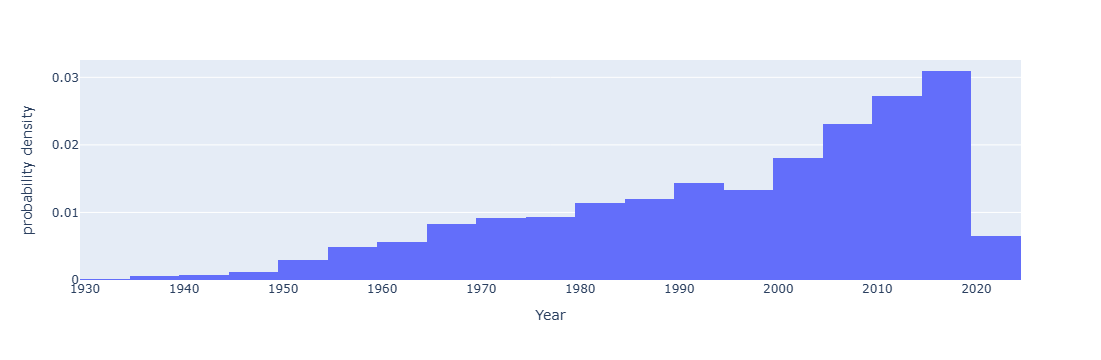

In [140]:
year = px.histogram(data, x = 'Year', histnorm='probability density', nbins = 30)
year.show()

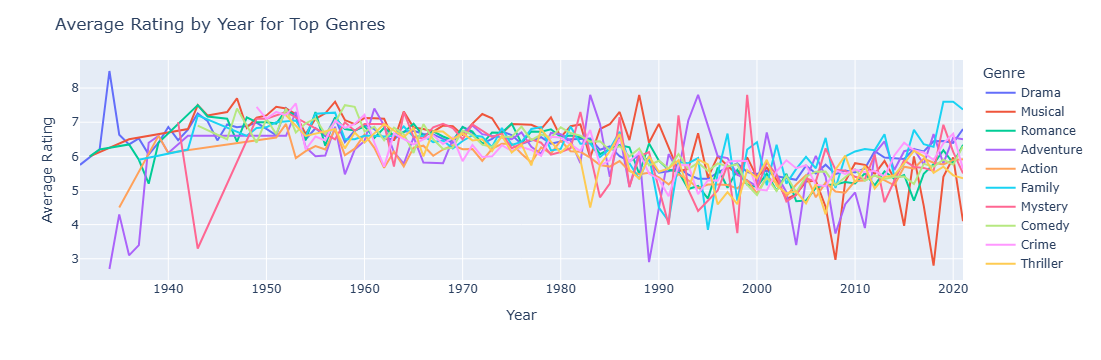

In [142]:
avg_rating = data.groupby(['Year','Genre'])['Rating'].mean().reset_index()
top_genres = data['Genre'].value_counts().head(10).index
avg_rating = avg_rating[avg_rating['Genre'].isin(top_genres)]
fig = px.line(avg_rating, x='Year', y='Rating', color = "Genre")
fig.update_layout(title='Average Rating by Year for Top Genres', xaxis_title='Year', yaxis_title='Average Rating')
fig.show()

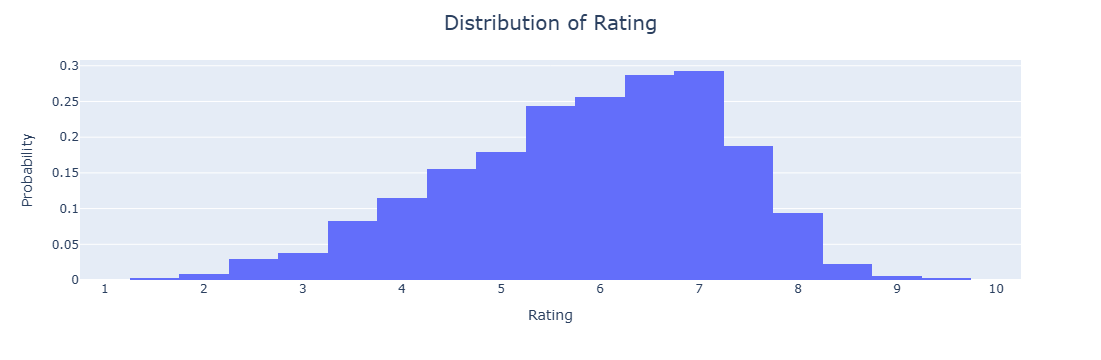

In [144]:
rating_fig = px.histogram(data, x='Rating', histnorm='probability density', nbins=40)
rating_fig.update_layout(
    title='Distribution of Rating', 
    title_x=0.5,
    title_pad=dict(t=20),
    title_font=dict(size=20),
    xaxis_title='Rating', 
    yaxis_title='Probability'
)
rating_fig.show()


In [146]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [148]:
data.drop('Name', axis = 1, inplace = True)

In [150]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating


In [152]:
X = data[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
Model = LinearRegression()
Model.fit(X_train, y_train)
Model_pred = Model.predict(X_test)

In [156]:
print('The performance evaluation of Linear Regression is below: \n')
print('Mean squared error:', mean_squared_error(y_test, Model_pred))
print('Mean absolute error:', mean_absolute_error(y_test, Model_pred))
print('R2 score:', r2_score(y_test, Model_pred))

The performance evaluation of Linear Regression is below: 

Mean squared error: 0.446711946720519
Mean absolute error: 0.4921058254109181
R2 score: 0.7640247360239619


In [158]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
5,1997,827,147,6.246845,5.335135,4.793617,5.73,5.93
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93


In [160]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [162]:
data = {
    'Year': [2019], 
    'Votes': [36], 
    'Duration': [111], 
    'Genre_mean_rating': [5.8], 
    'Director_encoded': [4.5], 
    'Actor1_encoded': [5.3], 
    'Actor2_encoded': [4.5], 
    'Actor3_encoded': [4.8]
}
trail = pd.DataFrame(data)

In [164]:
rating_predicted = Model.predict(trail)

In [166]:
print("Predicted Rating:", rating_predicted[0])

Predicted Rating: 4.313835746991805
